In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('station_day.csv')

In [3]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [4]:
df.sem()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_17284\1459226325.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sem()


PM2.5      0.260333
PM10       0.482867
NO         0.114381
NO2        0.097566
NOx        0.148411
NH3        0.101704
CO         0.014174
SO2        0.045117
O3         0.136253
Benzene    0.040314
Toluene    0.111460
Xylene     0.042773
AQI        0.445167
dtype: float64

In [5]:
df.var()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_17284\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


PM2.5       5856.290285
PM10       15232.168541
NO          1189.630360
NO2          870.888918
NOx         2038.159113
NH3          619.900311
CO            19.093210
SO2          168.603041
O3          1531.000683
Benzene      124.461568
Toluene      861.339577
Xylene        41.892072
AQI        17246.081978
dtype: float64

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_17284\4033294746.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness=df.skew()


PM2.5       2.563924
PM10        1.644048
NO          3.288711
NO2         2.359287
NOx         2.539785
NH3         3.218919
CO         12.197951
SO2         4.581281
O3          6.844483
Benzene    21.617020
Toluene     4.598335
Xylene      8.629739
AQI         1.930088
dtype: float64


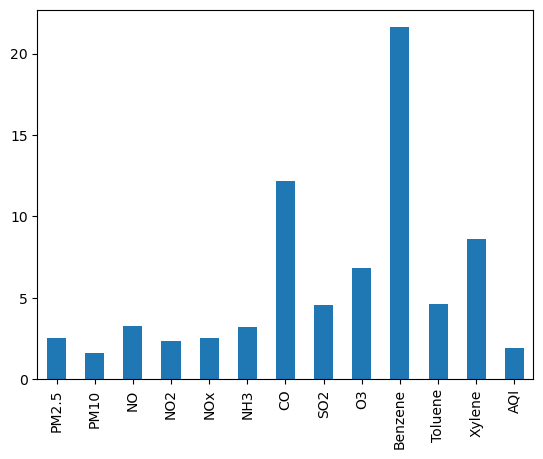

In [6]:
skewness=df.skew()
print(skewness)
skewness.plot(kind='bar')
plt.show()

C:\Users\Udhaya\AppData\Local\Temp\ipykernel_17284\1025669927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  kurt = df.kurtosis()


PM2.5       10.624383
PM10         3.383081
NO          14.052937
NO2         11.060617
NOx          8.454915
NH3         22.771798
CO         224.168893
SO2         34.720632
O3          75.831363
Benzene    695.202826
Toluene     33.337213
Xylene     119.569160
AQI          8.532544
dtype: float64


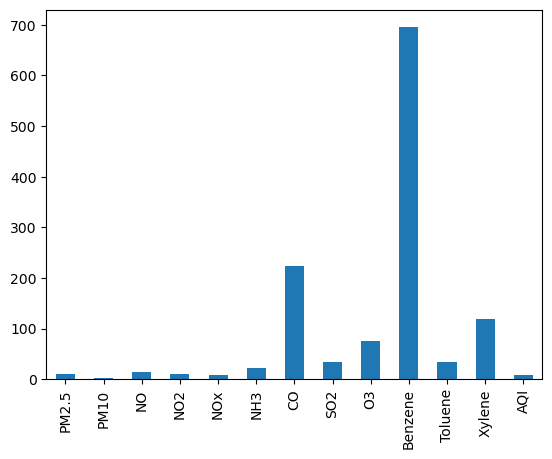

In [7]:
kurt = df.kurtosis()
print(kurt)
kurt.plot(kind='bar')
plt.show()

In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [4]:
df['PM2.5'] = df['PM2.5'].fillna(df.groupby('StationId')['PM2.5'].transform('mean'))
df['PM10'] = df['PM10'].fillna(df.groupby('StationId')['PM10'].transform('mean'))
df['NO'] = df['NO'].fillna(df.groupby('StationId')['NO'].transform('mean'))
df['NO2'] = df['NO2'].fillna(df.groupby('StationId')['NO2'].transform('mean'))
df['NOx'] = df['NOx'].fillna(df.groupby('StationId')['NOx'].transform('mean'))
df['NH3'] = df['NH3'].fillna(df.groupby('StationId')['NH3'].transform('mean'))
df['CO'] = df['CO'].fillna(df.groupby('StationId')['CO'].transform('mean'))
df['SO2'] = df['SO2'].fillna(df.groupby('StationId')['SO2'].transform('mean'))
df['O3'] = df['O3'].fillna(df.groupby('StationId')['O3'].transform('mean'))
df['Benzene'] = df['Benzene'].fillna(df.groupby('StationId')['Benzene'].transform('mean'))
df['Toluene'] = df['Toluene'].fillna(df.groupby('StationId')['Toluene'].transform('mean'))
df['Xylene'] = df['Xylene'].fillna(df.groupby('StationId')['Xylene'].transform('mean'))

In [5]:
df.isnull().sum()

StationId         0
Date              0
PM2.5          4948
PM10          30172
NO              738
NO2               0
NOx            3460
NH3           39604
CO             1553
SO2            9128
O3            10594
Benzene       18290
Toluene       23528
Xylene        79219
AQI           21010
AQI_Bucket    21010
dtype: int64

In [6]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))

In [7]:
df.isnull().sum()

StationId         0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene           0
Toluene           0
Xylene            0
AQI           21010
AQI_Bucket    21010
dtype: int64

In [8]:
df['Date'].apply(pd.to_datetime)
df.set_index('Date',inplace=True)

In [9]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x > 50 and x <= 100:
        return x
    elif x > 100 and x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x > 250 and x <= 350:
        return 200 + (x - 250)
    elif x > 350 and x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0
df["PM10_SubIndex"] = df["PM10"].astype(int).apply(lambda x: get_PM10_subindex(x))

In [10]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5"].astype(int).apply(lambda x: get_PM25_subindex(x))

In [16]:
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2"].astype(int).apply(lambda x: get_SO2_subindex(x))

In [11]:
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NOx_SubIndex"] = df["NOx"].astype(int).apply(lambda x: get_NOx_subindex(x))

In [12]:
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x > 200 and x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x > 400 and x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x > 800 and x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x > 1200 and x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3"].astype(int).apply(lambda x: get_NH3_subindex(x))

In [13]:
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

In [15]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3"].astype(int).apply(lambda x: get_O3_subindex(x))

In [17]:
df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex","NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis=1)))

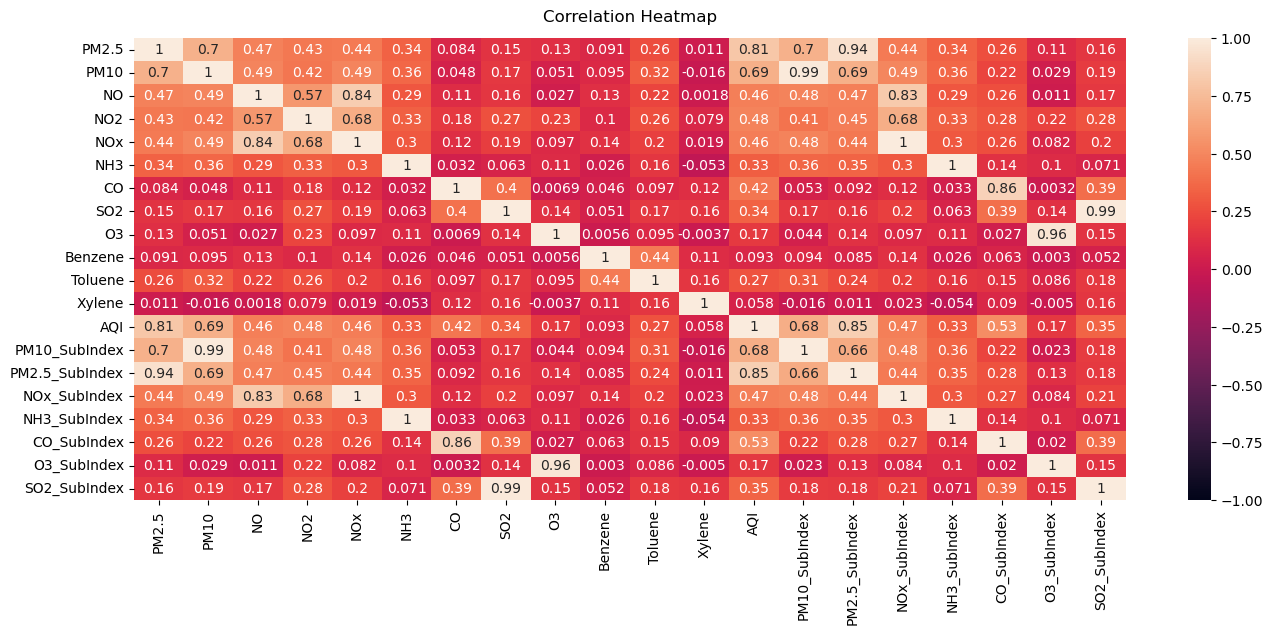

In [18]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [19]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [20]:
df_Station_hour = df.copy()
df_Station_hour.columns

Index(['StationId', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'PM10_SubIndex', 'PM2.5_SubIndex', 'NOx_SubIndex', 'NH3_SubIndex',
       'CO_SubIndex', 'O3_SubIndex', 'SO2_SubIndex'],
      dtype='object')

In [40]:
X=df[["PM2.5", "PM10", "SO2", "NOx","NH3", "CO", "O3", 'Benzene', 'Toluene', 'Xylene']]
y=df[['AQI']]

In [41]:
logis=LogisticRegression(solver='lbfgs')

In [44]:
X_train_minmax, X_test_minmax, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [35]:
logis.fit(X_train_minmax, y_train)

C:\Users\Udhaya\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Udhaya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predicted = logis.predict(X_test_minmax)
predicted

array([115., 290., 115., ..., 115.,  91., 115.])

In [50]:
print('Root Squared Error :',format(np.sqrt( mean_squared_error(y_test,predicted))))
print('R_squared:',r2_score(y_test,predicted))
print("Mean absolute error :", mean_absolute_error(y_test,predicted))

Root Squared Error : 98.70878845101024
R_squared: 0.36906229879819163
Mean absolute error : 63.89272160686187
